In [1]:
%tensorflow_version 2.x

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images/255.0, test_images/255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 4s 0us/step


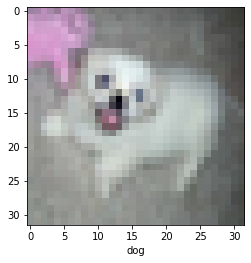

In [9]:
IMG_INDEX = 7000

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.0464 - accuracy: 0.6309 - val_loss: 0.9861 - val_accuracy: 0.6503
Epoch 2/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9111 - accuracy: 0.6801 - val_loss: 0.9028 - val_accuracy: 0.6842
Epoch 3/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8280 - accuracy: 0.7109 - val_loss: 0.9438 - val_accuracy: 0.6754
Epoch 4/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7478 - accuracy: 0.7369 - val_loss: 0.8830 - val_accuracy: 0.6962
Epoch 5/10
1563/1563 [==============================] - 55s 36ms/step - loss: 0.6941 - accuracy: 0.7565 - val_loss: 0.8795 - val_accuracy: 0.6973
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.6549 - accuracy: 0.7665 - val_loss: 0.8394 - val_accuracy: 0.7158
Epoch 7/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.6038 - accuracy: 0.7866 - val_loss: 0.8839 -

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 3s - loss: 0.9141 - accuracy: 0.7101
0.710099995136261


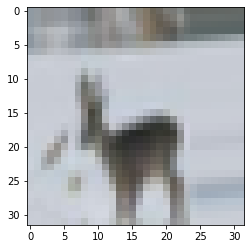

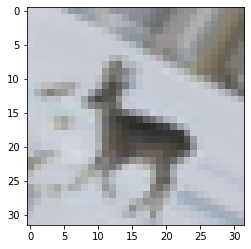

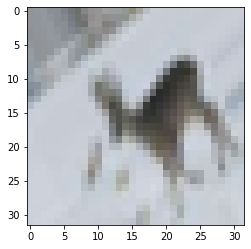

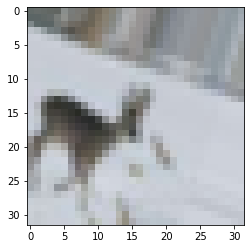

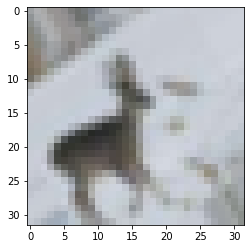

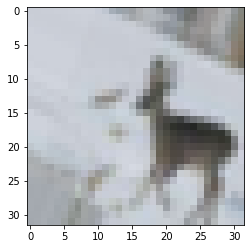

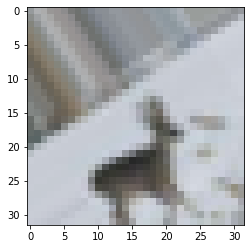

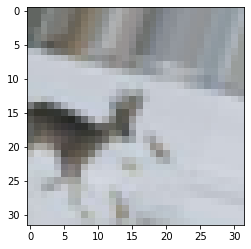

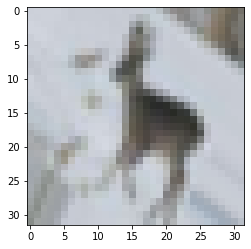

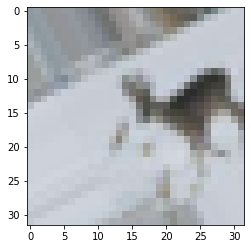

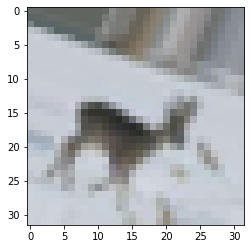

In [18]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# creates a data generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

# pick an image to transform
test_img = train_images[20]
img = image.img_to_array(test_img)  # convert image to numpy arry
img = img.reshape((1,) + img.shape)  # reshape image

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 10:  # show 4 images
        break

plt.show()